<a href="https://colab.research.google.com/github/ruzan-ai/churn_project_end_to_end/blob/main/EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [19]:
import pandas as pd

# 1. Load Data
file_path = "/content/drive/MyDrive/Data Set/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

| Column Name | Description |
|-------------|-------------|
| `customerID` | Unique identifier for each customer |
| `gender` | Customer's gender: Male or Female |
| `SeniorCitizen` | 1 if customer is a senior citizen, 0 otherwise |
| `Partner` | Yes if the customer has a partner/spouse, else No |
| `Dependents` | Yes if the customer has dependents (e.g., children), else No |
| `tenure` | Number of months the customer has been with the company |
| `PhoneService` | Yes if the customer has phone service, else No |
| `MultipleLines` | Yes if the customer has multiple phone lines, else No or No phone service |
| `InternetService` | Type of internet service: DSL, Fiber optic, or None |
| `OnlineSecurity` | Whether the customer has online security service |
| `OnlineBackup` | Whether the customer has online backup service |
| `DeviceProtection` | Whether the customer has device protection service |
| `TechSupport` | Whether the customer has tech support service |
| `StreamingTV` | Whether the customer streams TV |
| `StreamingMovies` | Whether the customer streams movies |
| `Contract` | Type of contract: Month-to-month, One year, or Two year |
| `PaperlessBilling` | Yes if billing is paperless (online), else No |
| `PaymentMethod` | How the customer pays: Bank transfer, credit card, etc. |
| `MonthlyCharges` | The amount charged to the customer monthly |
| `TotalCharges` | Total amount charged over the customer's entire tenure |
| `Churn` | Target variable: Yes if customer left (churned), else No |

In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [6]:
print(df.shape)
print(df.dtypes)
df.describe(include='all')

(7032, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


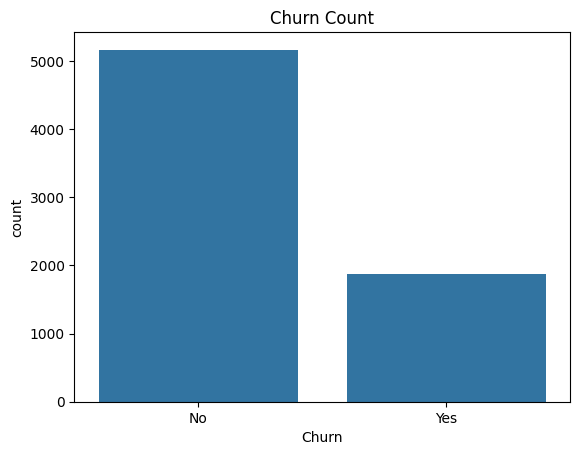

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()

# Percentage churn
print(df['Churn'].value_counts(normalize=True) * 100)

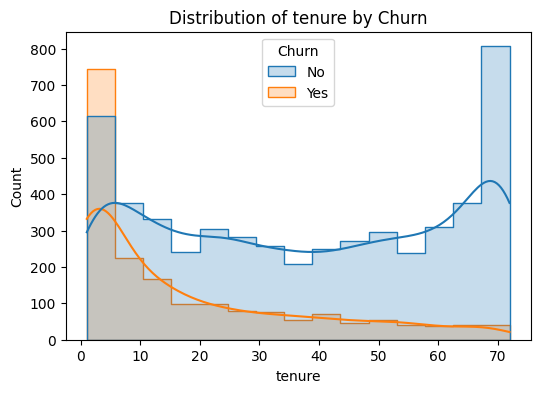

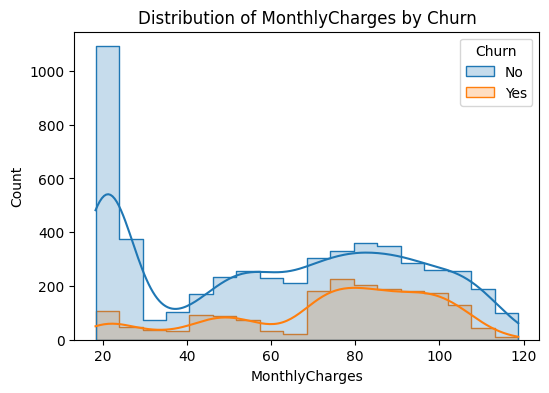

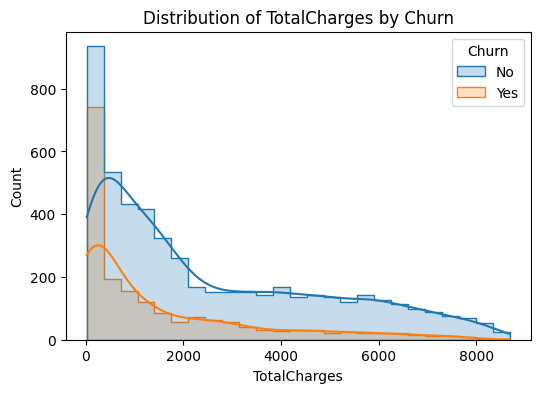

In [8]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, hue='Churn', element="step")
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

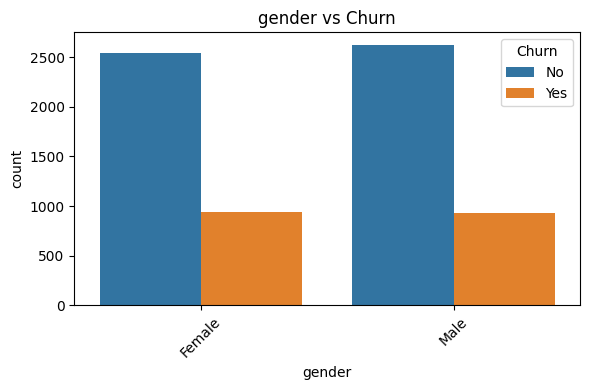

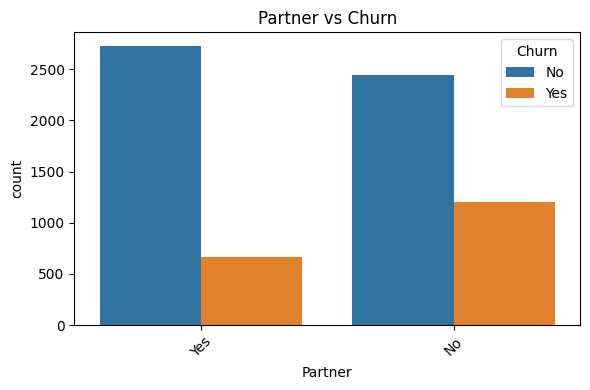

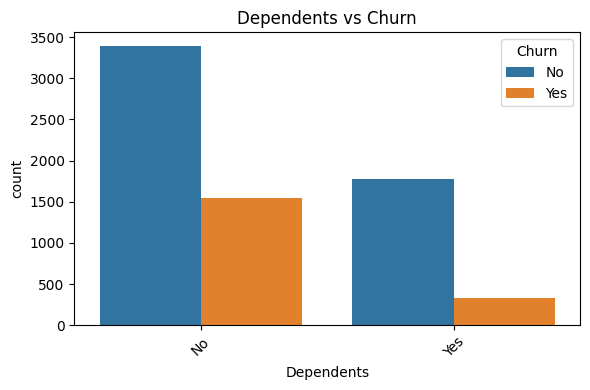

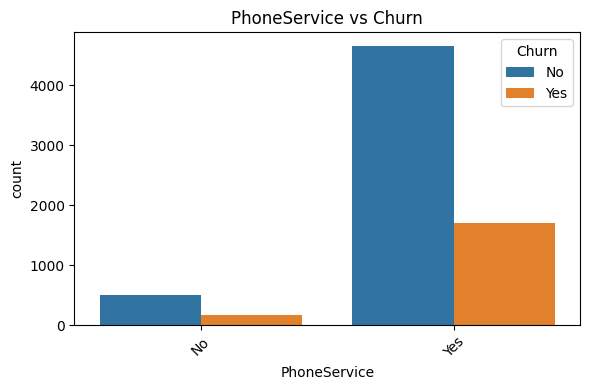

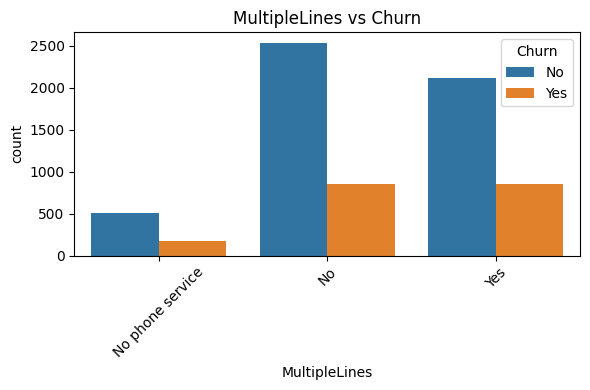

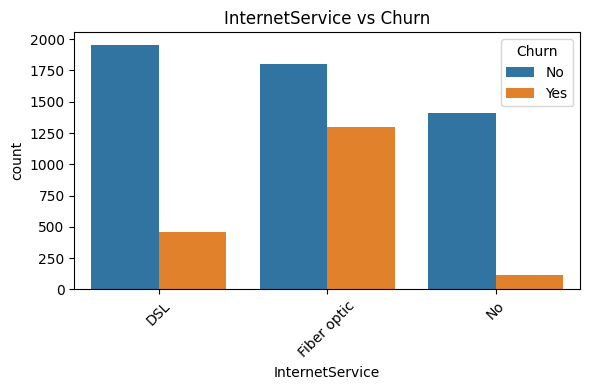

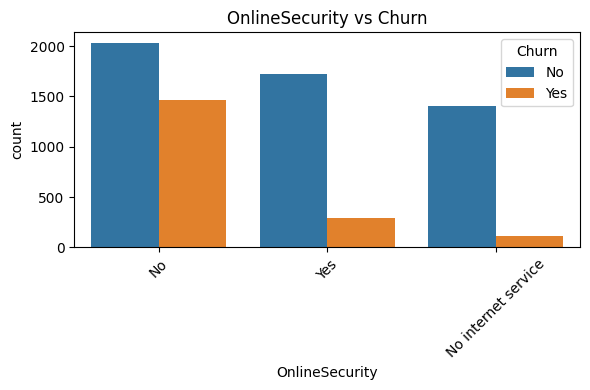

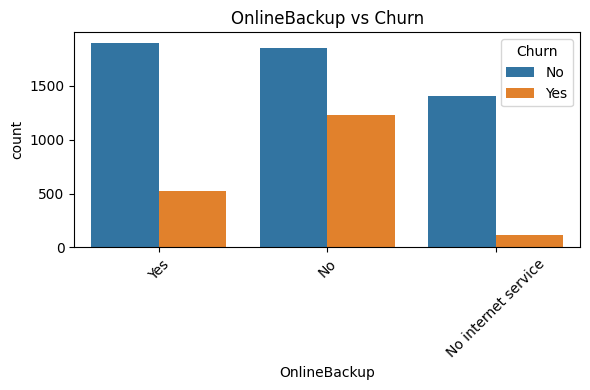

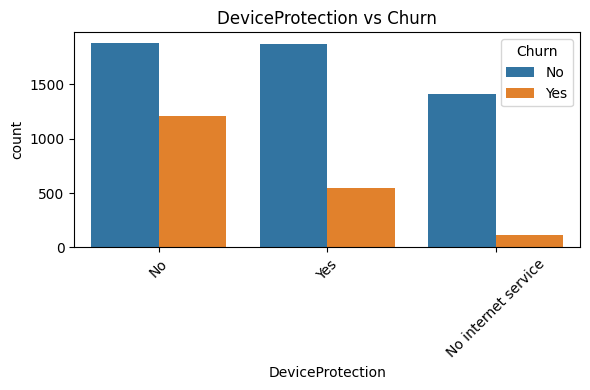

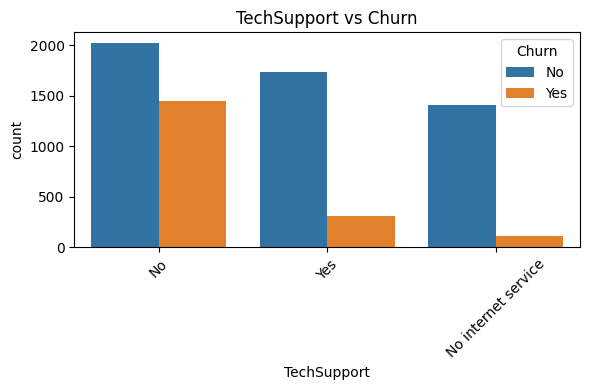

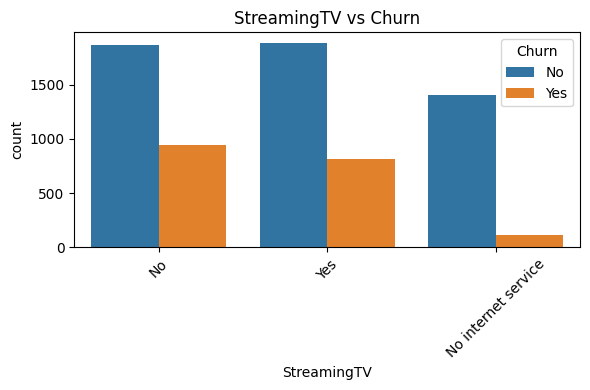

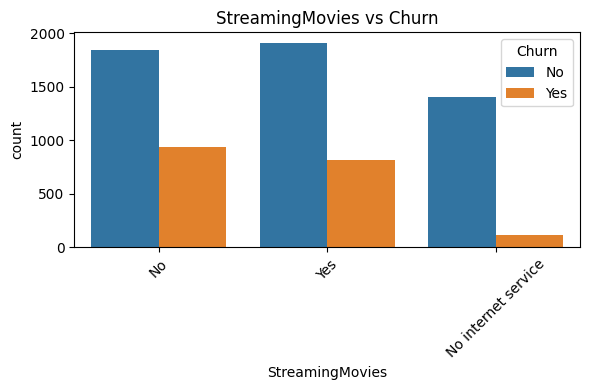

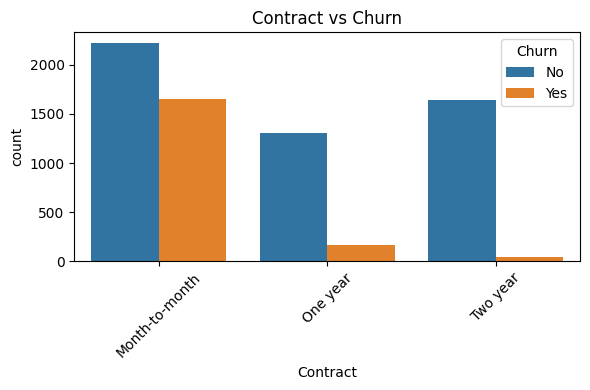

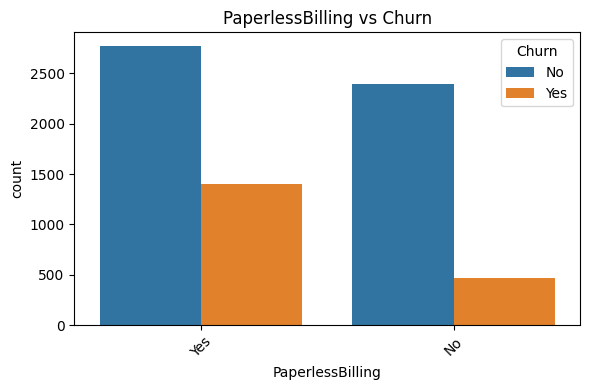

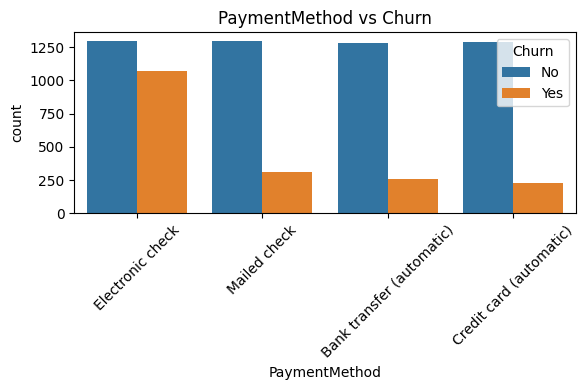

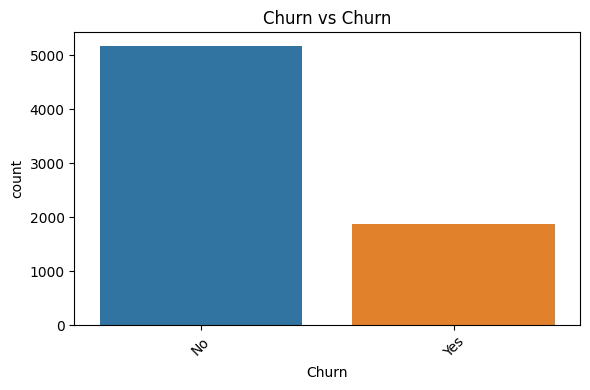

In [9]:
cat_cols = df.select_dtypes(include='object').columns.drop('customerID')

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


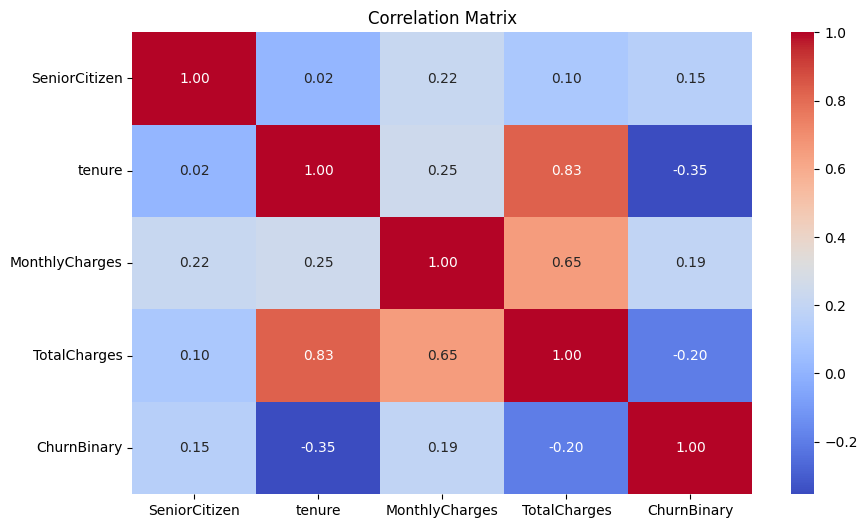

In [11]:
# Convert 'Churn' to binary
df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric columns only
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [12]:
# Clean data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [15]:
# Scale numeric features
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [16]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

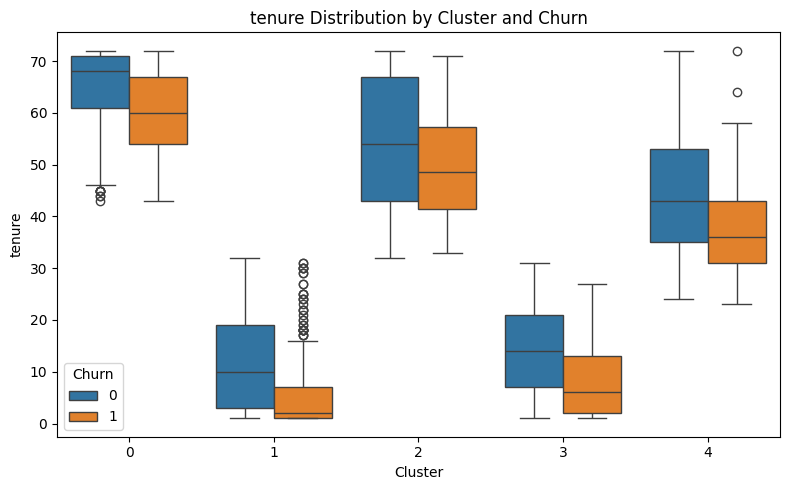

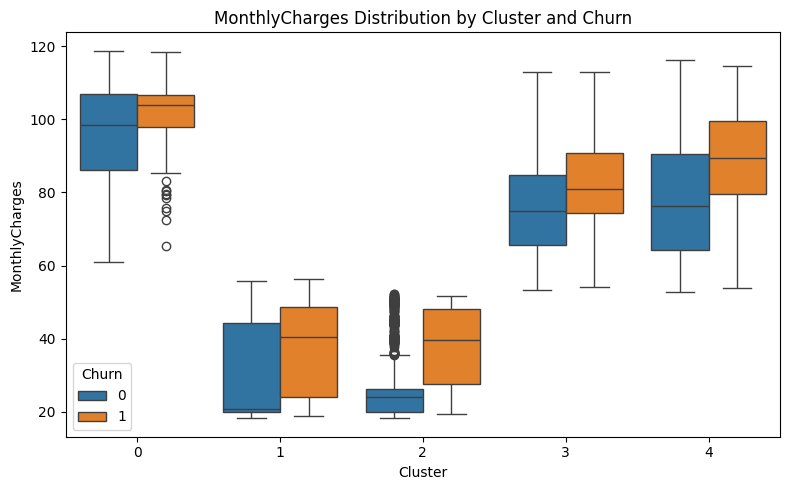

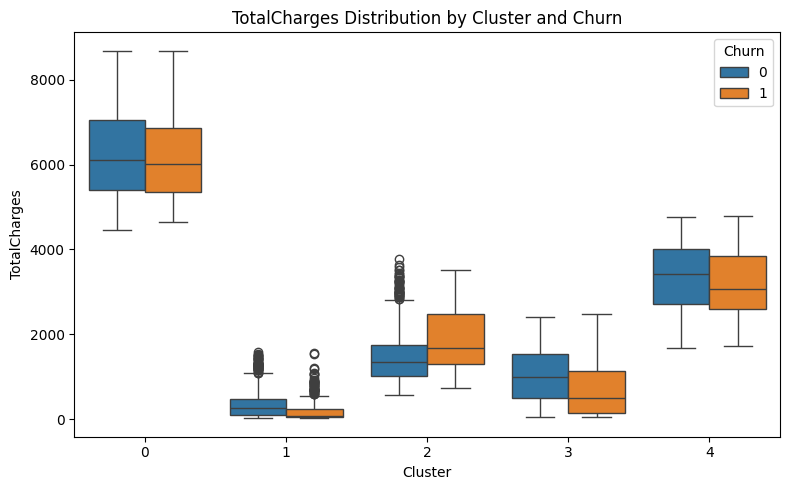

In [17]:
# Plot boxplots of each numeric variable by Cluster and Churn
for col in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Cluster', y=col, hue='Churn')
    plt.title(f"{col} Distribution by Cluster and Churn")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

<ipython-input-18-7179bf1c58eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_percent, x='Cluster', y='Churn %', palette='coolwarm')


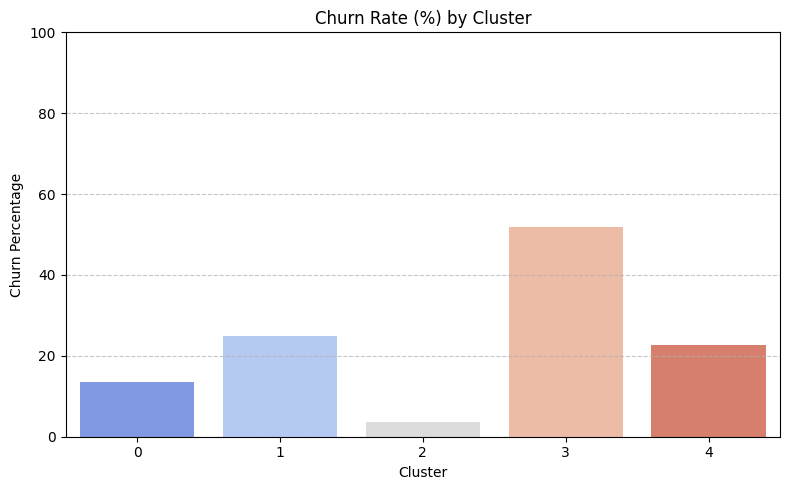

In [18]:
# Calculate churn % per cluster
churn_percent = df.groupby('Cluster')['Churn'].mean().reset_index()
churn_percent['Churn %'] = churn_percent['Churn'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=churn_percent, x='Cluster', y='Churn %', palette='coolwarm')
plt.title("Churn Rate (%) by Cluster")
plt.ylabel("Churn Percentage")
plt.xlabel("Cluster")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()